In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Importer le fichier CSV
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values  # Températures moyennes
labels = data.iloc[:, 0].values  # Noms des villes


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée cumulée
explained_variance = np.cumsum(pca.explained_variance_ratio_)

print("Variance expliquée par chaque axe :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", explained_variance)

# Efficacité de la réduction de dimensions :

# Les résultats montrent que les deux premières composantes principales capturent environ 99 % de la variance 
# totale des données, ce qui indique que la structure principale des données est bien représentée en seulement 
# deux dimensions. Cette réduction de dimensions permet de simplifier l’analyse sans perte significative 
# d’information.

# Interprétation des axes principaux :

# La première composante principale (87,27 %) représente probablement des variations majeures liées aux 
# différences globales de températures moyennes entre les villes, peut-être influencées par leur emplacement 
# géographique (Nord-Sud, intérieur-côtier).
# La deuxième composante principale (11,72 %) pourrait refléter des variations saisonnières ou des différences
# climatiques plus spécifiques à certaines périodes de l’année (par exemple, hiver doux ou été chaud).

# Pertinence des autres composantes :

# Les composantes suivantes (à partir de la troisième) capturent très peu de variance (<1 % chacune). Leur 
# contribution est donc négligeable pour cette analyse, ce qui justifie leur exclusion dans l’interprétation.
# Avantages pratiques de l’ACP :

# La possibilité de visualiser les villes dans un plan bidimensionnel aide à détecter des regroupements 
# potentiels ou des différences topologiques.
# Cette simplification rend également les données plus accessibles pour une analyse exploratoire et des 
# visualisations graphiques.

# Conclusion :
# L'ACP a montré que le jeu de données est fortement structuré autour de deux dimensions dominantes, ce qui confirme que cette méthode est adaptée pour explorer et résumer ces données climatiques.

Variance expliquée par chaque axe : [8.72681935e-01 1.17206018e-01 4.69562816e-03 2.64791321e-03
 1.13528034e-03 5.01361084e-04 4.22889550e-04 3.28173500e-04
 1.51658537e-04 1.17643729e-04 8.36434653e-05 2.78555007e-05]
Variance expliquée cumulée : [0.87268193 0.98988795 0.99458358 0.99723149 0.99836677 0.99886814
 0.99929103 0.9996192  0.99977086 0.9998885  0.99997214 1.        ]


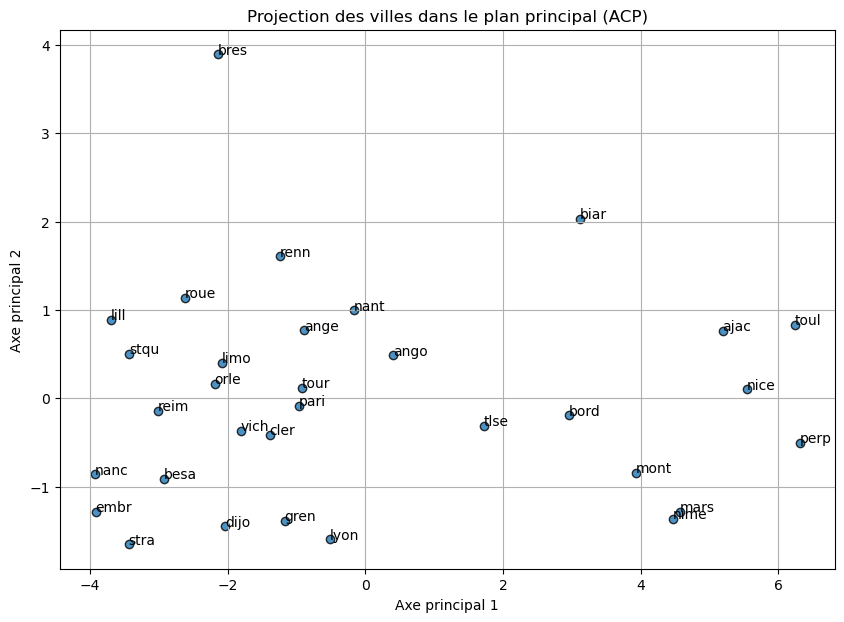

In [ ]:
# Visualisation graphique
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, edgecolors='k')

# Annoter les points avec les noms des villes
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.title("Projection des villes dans le plan principal (ACP)")
plt.xlabel("Axe principal 1")
plt.ylabel("Axe principal 2")
plt.grid()
plt.show()


# 1. Les villes "ajac," "toul," "nice" et "perp" sont des points atypiques, nettement séparées de la majorité des autres villes.  
# 2. Les villes "lyon," "dijo" et "gren" forment un groupe compact près de l'origine, indiquant des caractéristiques fortement 
# similaires.  
# 3. Les villes "biar" et "mars" se situent aux extrémités des axes principaux, montrant des attributs distincts par rapport aux a
# utres.  
# 4. Le premier axe principal capture la majeure partie de la variation des données, avec une répartition large des villes le long 
# de cet axe.  
# 5. Le second axe principal montre également de la variabilité, mais joue un rôle moins dominant dans la séparation des clusters.  
# 6. Des regroupements clairs sont visibles autour des coordonnées \((-2, 0)\) et \((0, -1)\), reflétant des caractéristiques 
# partagées entre les villes de ces zones.  
# 7. La projection distingue efficacement les villes avec des caractéristiques uniques tout en montrant des chevauchements pour 
# celles qui se ressemblent.  


Variance expliquée par chaque axe : [0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]
Variance expliquée cumulée : [0.58785136 0.76481162 0.86849971 0.91370429 0.95055778 0.98227771
 1.        ]


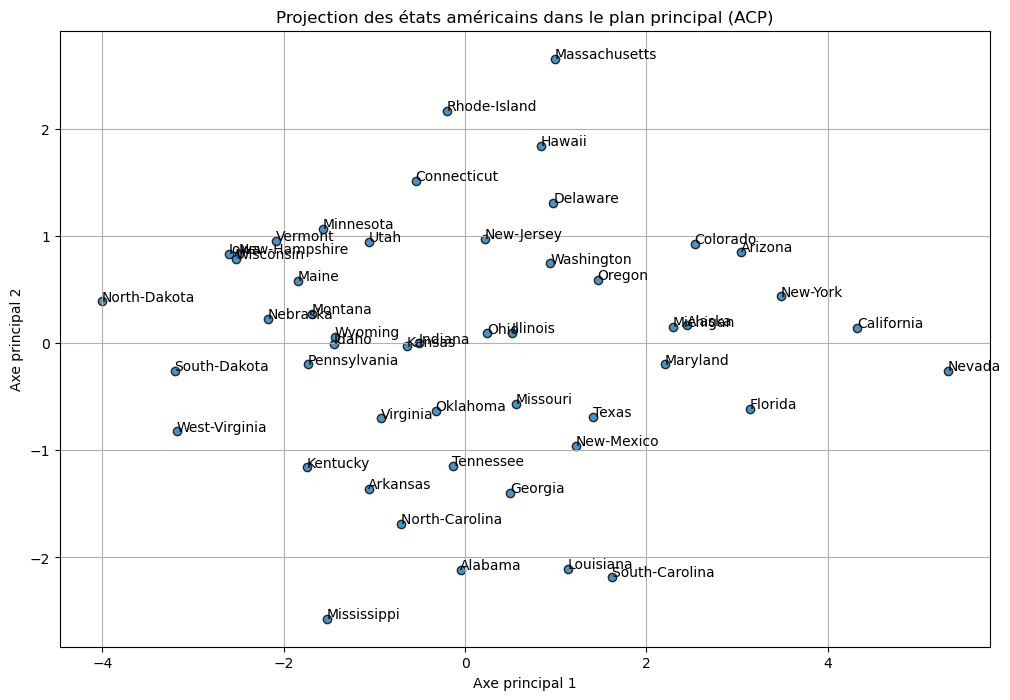

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')  # Désactiver les avertissements pour une sortie propre

# Charger le fichier CSV
data = pd.read_csv('./crimes.csv', sep=';')  
X = data.iloc[:, 1:].values  # Extraire les colonnes contenant les statistiques des crimes
labels = data.iloc[:, 0].values  # Extraire les noms des états américains

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Centrer et réduire les données pour l'ACP

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)  # Calculer les nouvelles coordonnées des états dans l'espace réduit

# Afficher la variance expliquée par chaque composante principale
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée par chaque axe :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", explained_variance)

# Visualisation dans le plan défini par les deux premières composantes principales
plt.figure(figsize=(12, 8))  # Configurer la taille de la figure
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, edgecolors='k')  # Nuage de points

# Annoter chaque point avec le nom des états
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Ajouter un titre et des étiquettes aux axes
plt.title("Projection des états américains dans le plan principal (ACP)")
plt.xlabel("Axe principal 1")
plt.ylabel("Axe principal 2")
plt.grid()  # Ajouter une grille pour faciliter la lecture
plt.show()



# Le premier axe principal (Axe 1) explique 58,79% de la variance totale des données.
# Le second axe principal (Axe 2) explique 17,70% de la variance totale des données.
# Ensemble, les deux premiers axes capturent 76,48% de la variance totale, ce qui permet une bonne représentation des données 
# dans le plan principal.
# Dispersion des états :

# Les états comme Nevada et California sont situés aux extrémités de l'Axe 1, indiquant des caractéristiques très spécifiques, 
# potentiellement liées à des taux de criminalité ou à d'autres variables distinctes.
# Mississippi est isolé sur l'Axe 2, suggérant des attributs uniques différents des autres états.
# Clusters :

# Un groupe dense d'états est visible autour de l'origine, comprenant des états comme Kansas, Nebraska, South-Dakota. Cela indique 
# une certaine homogénéité dans leurs statistiques de crimes.
# Les états du nord-est comme Rhode-Island et Massachusetts forment également un petit cluster en haut à droite, indiquant des 
# similarités.
# Outliers :

# Des états comme Nevada, Mississippi, California et Hawaii se distinguent nettement des autres, indiquant des caractéristiques très 
# différentes dans leurs données.
# Variance cumulative :

# Les 7 composantes principales expliquent 100% de la variance totale. Cependant, les 3 premières composantes capturent déjà 86,85%, 
# ce qui signifie que les dimensions restantes n’apportent que peu d’informations supplémentaires.
# Interprétation générale :

# La visualisation montre que l'ACP est efficace pour réduire la dimensionnalité tout en capturant les principales distinctions 
# entre les états. Les états avec des caractéristiques extrêmes ou uniques sont bien mis en évidence.

   Id  Depenses R&D  Depenses Administration  Depenses Marketing Spend  \
0   1     165349.20                136897.80                 471784.10   
1   2     162597.70                151377.59                 443898.53   
2   3     153441.51                101145.55                 407934.54   
3   4     144372.41                118671.85                 383199.62   
4   5     142107.34                 91391.77                 366168.42   

    Benefice  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  
Variance expliquée par chaque axe : [0.667745   0.25487399 0.07225393 0.00512709]
Variance expliquée cumulée : [0.667745   0.92261898 0.99487291 1.        ]


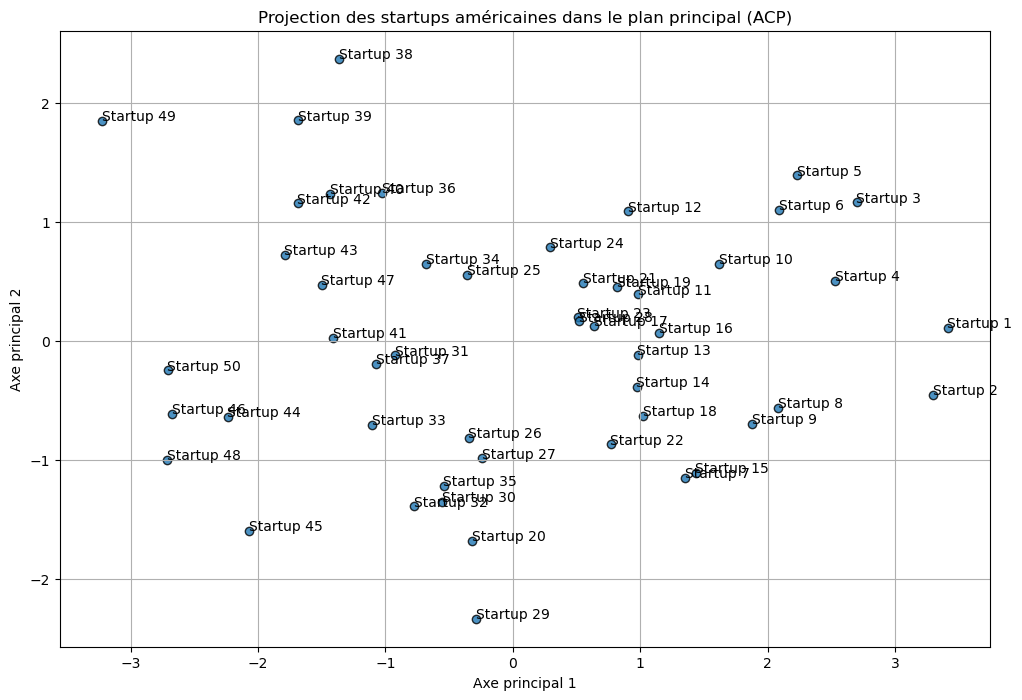

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')  # Désactiver les avertissements pour une sortie propre

# Charger le fichier CSV
data = pd.read_csv('./50_Startups.csv', sep=';')

# Vérifier les données chargées
print(data.head())

# Séparer les variables explicatives (dépenses) et la variable cible (Bénéfice)
X = data.iloc[:, :-1].values  # Colonnes : R&D, Administration, Marketing
labels = data.iloc[:, -1].values  # Dernière colonne : Bénéfice

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Centrer et réduire les données pour l'ACP

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)  # Calculer les nouvelles coordonnées des startups dans l'espace réduit

# Afficher la variance expliquée par chaque composante principale
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée par chaque axe :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", explained_variance)

# Visualisation dans le plan défini par les deux premières composantes principales
plt.figure(figsize=(12, 8))  # Configurer la taille de la figure
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, edgecolors='k')  # Nuage de points

# Annoter chaque point avec les index des startups (ou un autre identifiant)
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
    plt.annotate(f"Startup {i+1}", xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Ajouter un titre et des étiquettes aux axes
plt.title("Projection des startups américaines dans le plan principal (ACP)")
plt.xlabel("Axe principal 1")
plt.ylabel("Axe principal 2")
plt.grid()  # Ajouter une grille pour faciliter la lecture
plt.show()




# Le premier axe principal (Axe 1) explique 66,77% de la variance totale des données.
# Le second axe principal (Axe 2) explique 25,49% de la variance totale.
# Les deux premiers axes principaux capturent ensemble 92,26% de la variance totale, ce qui garantit une représentation adéquate des 
# données dans le plan principal.
# Dispersion des startups :

# Les startups 3, 5, 6, et 1 se trouvent éloignées des autres, suggérant qu'elles ont des caractéristiques distinctes, probablement liées à leurs dépenses ou bénéfices.
# Les startups proches de l'origine, comme 31, 41, 42, montrent une similarité dans leurs caractéristiques.
# Clusters visibles :

# Un cluster dense de startups est visible entre (−1,−1) et (0,1), indiquant des similitudes en termes de dépenses et de bénéfices pour 
# ces startups.
# Les startups comme Startup 38 et 49 forment des groupes isolés dans des zones distinctes du graphe.
# Outliers :

# Les startups 1, 2, et 5 sont des outliers le long de l'Axe 1, tandis que Startup 38 est isolée sur l'Axe 2.
# Importance des axes :

# L'Axe 1 capte la majorité de la variance, indiquant qu'il est fortement influencé par une ou plusieurs variables explicatives 
# (par exemple, dépenses en R&D ou marketing).
# L'Axe 2 apporte une contribution importante, bien que moindre, en capturant des variations supplémentaires dans les données.
# Variance cumulative :

# Les trois premières composantes principales capturent 99,48% de la variance totale, ce qui signifie que les dimensions restantes 
# n'apportent qu'une contribution négligeable.


                     Species     BodyW  BrainW   SWS   PS    TS  LifeSpan  \
0         African elephant    6654.000  5712.0  8.35  1.8   3.3      38.6   
1  African giant pouched rat     1.000     6.6  6.30  2.0   8.3       4.5   
2               Arctic Fox       3.385    44.5  8.35  1.8  12.5      14.0   
3    Arctic ground squirrel      0.920     5.7  8.35  1.8  16.5      15.1   
4           Asian elephant    2547.000  4603.0  2.10  1.8   3.9      69.0   

      GT  PI  SEI  ODI  
0  645.0   3    5    3  
1   42.0   3    1    3  
2   60.0   1    1    1  
3   25.0   5    2    3  
4  624.0   3    5    4  
Variance expliquée par chaque axe : [0.48017524 0.22078825 0.12605711 0.06488067 0.04739057 0.02607844
 0.01797744 0.00920976 0.00501433 0.00242818]
Variance expliquée cumulée : [0.48017524 0.70096349 0.82702061 0.89190128 0.93929184 0.96537029
 0.98334773 0.99255749 0.99757182 1.        ]


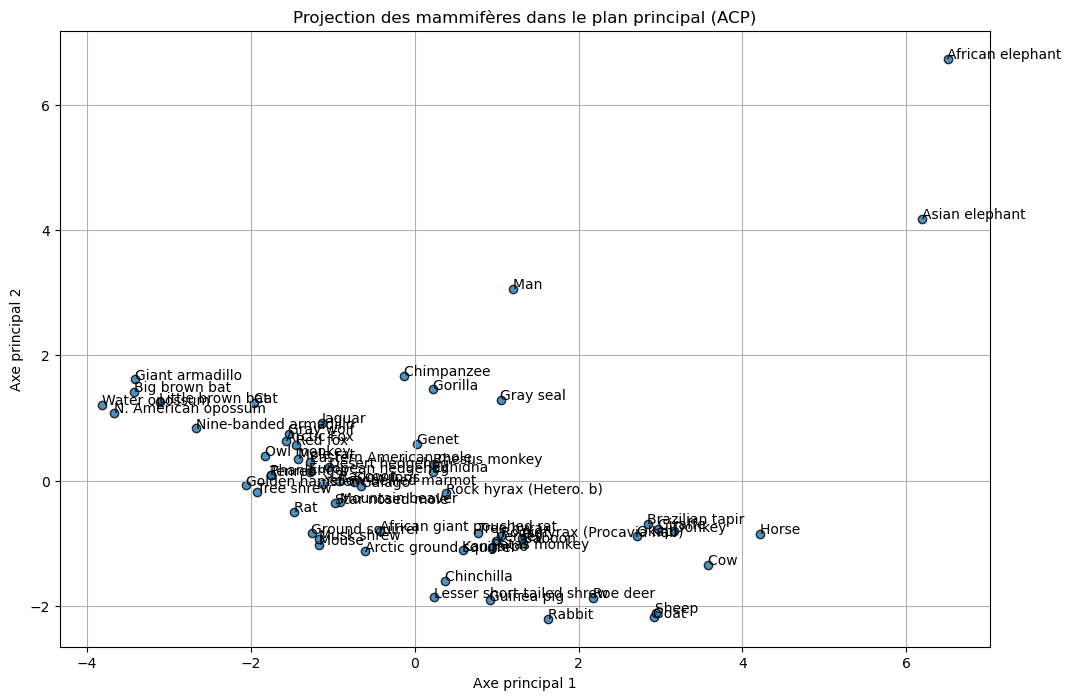

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')  # Désactiver les avertissements pour une sortie propre

# Charger le fichier CSV
data = pd.read_csv('./mammals.csv', sep=';')

# Vérification des données
print(data.head())

# Séparer les variables explicatives et les noms des mammifères
X = data.iloc[:, 1:].values  # Variables numériques (toutes sauf le nom des mammifères)
labels = data.iloc[:, 0].values  # Noms des mammifères

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Centrer et réduire les données pour l'ACP

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)  # Calculer les nouvelles coordonnées des mammifères dans l'espace réduit

# Afficher la variance expliquée par chaque composante principale
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée par chaque axe :", pca.explained_variance_ratio_)
print("Variance expliquée cumulée :", explained_variance)

# Visualisation dans le plan défini par les deux premières composantes principales
plt.figure(figsize=(12, 8))  # Configurer la taille de la figure
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, edgecolors='k')  # Nuage de points

# Annoter chaque point avec le nom des mammifères
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Ajouter un titre et des étiquettes aux axes
plt.title("Projection des mammifères dans le plan principal (ACP)")
plt.xlabel("Axe principal 1")
plt.ylabel("Axe principal 2")
plt.grid()  # Ajouter une grille pour faciliter la lecture
plt.show()

# Le premier axe principal (Axe 1) explique 48,02% de la variance totale.
# Le second axe principal (Axe 2) explique 22,08% de la variance totale.
# Les deux premiers axes capturent ensemble 70,09% de la variance totale, fournissant une bonne représentation globale des données 
# dans le plan principal.
# Dispersion des mammifères :

# Les éléphants africains et asiatiques sont clairement séparés des autres mammifères, reflétant leur poids corporel et cérébral 
# exceptionnels.
# L'humain est positionné distinctement, indiquant des caractéristiques uniques, probablement liées à des variables comme le poids 
# cérébral ou l'espérance de vie.
# Clusters visibles :

# Un groupe dense de mammifères, comprenant des espèces comme les chauves-souris, écureuils et mulots, est situé près de l'origine, 
# reflétant des caractéristiques similaires (petit poids corporel et cérébral).
# Les mammifères de taille moyenne, comme les chimpanzés et gorilles, forment un cluster distinct au-dessus de l'origine.
# Outliers :

# Les éléphants et l'humain se démarquent nettement des autres mammifères.
# Certains animaux, comme le cheval et la vache, sont isolés sur l'Axe 1, suggérant des différences notables dans leurs 
# caractéristiques par rapport aux clusters centraux.
# Importance des axes :

# L'Axe 1 est fortement influencé par des variables comme le poids corporel et cérébral.
# L'Axe 2 capture probablement des distinctions supplémentaires, comme l'espérance de vie ou le sommeil paradoxal (PS).
# Variance cumulative :

# Les 3 premières composantes principales capturent 82,70% de la variance totale, tandis que les autres axes contribuent très peu à 
# l'explication des données.



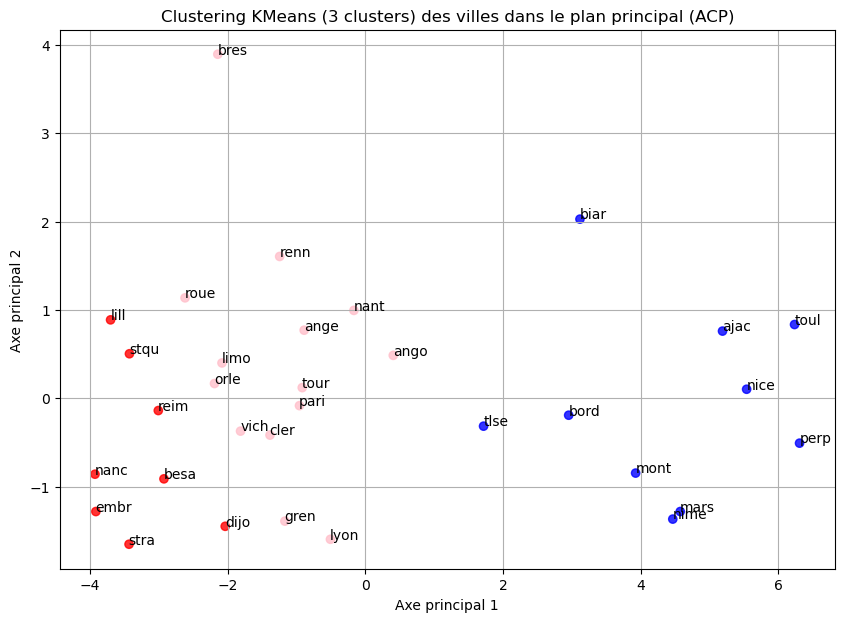

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib

import os
os.environ["OMP_NUM_THREADS"] = "1"

# Charger le fichier des villes
data = pd.read_csv('./villes.csv', sep=';')

# Extraction des données pour clustering
X = data.iloc[:, 1:13].values  # Colonnes contenant les données
labels = data.iloc[:, 0].values  # Noms des villes

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec l'ACP
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Clustering avec KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clustering = kmeans.fit_predict(X_scaled)  # Obtenir les clusters

# Visualisation des clusters
colors = ['red', 'yellow', 'blue', 'pink']  # Couleurs pour chaque cluster
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.8)

# Annoter les points avec le nom des villes
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Ajouter un titre et des étiquettes aux axes
plt.title("Clustering KMeans (3 clusters) des villes dans le plan principal (ACP)")
plt.xlabel("Axe principal 1")
plt.ylabel("Axe principal 2")
plt.grid()
plt.show()


# Cluster bleu :

# Les villes ajac, toul, nice, perp, mars appartiennent au cluster bleu. Ces villes sont positionnées à l'extrémité droite du graphe, indiquant des caractéristiques distinctes de celles des autres clusters.
# Cluster rouge :

# Les villes reim, gren, lyon, dijon, embr et d'autres proches de l'origine forment un cluster dense, indiquant une forte 
# homogénéité dans leurs caractéristiques.
# Cluster jaune :

# Les villes renn, nant, ange appartiennent au cluster jaune, positionné entre les clusters rouge et bleu, montrant des valeurs 
# intermédiaires selon les axes principaux.
# Séparation nette :

# Le cluster bleu est nettement séparé des clusters rouge et jaune le long de l'Axe 1, qui représente la principale source de 
# variabilité des données.
# L'Axe 2 permet de distinguer certaines villes comme biar et bres au sein du cluster bleu.
# Homogénéité au sein des clusters :

# Les clusters rouge et jaune regroupent des villes avec des caractéristiques similaires, tandis que le cluster bleu contient des 
# villes avec des valeurs éloignées des deux autres.
# Interprétation claire des groupes :

# Les clusters obtenus permettent de regrouper les villes en fonction de leurs caractéristiques spécifiques, avec une distinction 
# marquée entre les groupes.


Nombre de clusters: 2, Silhouette index: 0.625557719180767
Nombre de clusters: 3, Silhouette index: 0.38809425947195864
Nombre de clusters: 4, Silhouette index: 0.39249385306689233
Nombre de clusters: 5, Silhouette index: 0.33297421400004423
Nombre de clusters: 6, Silhouette index: 0.330102290758661
Nombre de clusters: 7, Silhouette index: 0.3310612510921217
Nombre de clusters: 8, Silhouette index: 0.37174337977441385
Nombre de clusters: 9, Silhouette index: 0.3735335681954005


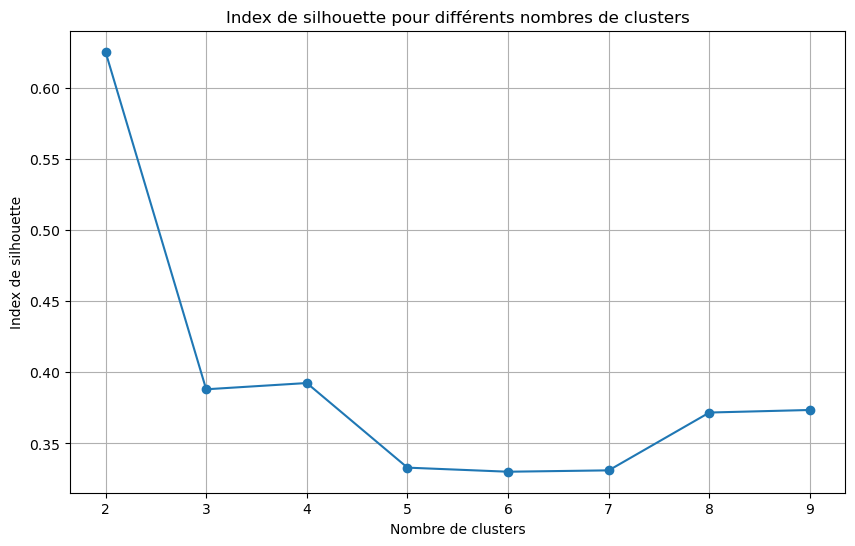

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"
# Calcul de l'index de silhouette pour différents nombres de clusters
silhouette_scores = []
range_n_clusters = range(2, 10)  # Tester de 2 à 9 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Nombre de clusters: {n_clusters}, Silhouette index: {silhouette_avg}")

# Visualisation de l'index de silhouette
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Index de silhouette pour différents nombres de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Index de silhouette")
plt.grid()
plt.show()

# Nombre optimal de clusters :
# L'index de silhouette le plus élevé est obtenu avec 2 clusters (0.6256), ce qui indique que ce nombre maximise la cohésion 
# intra-cluster et la séparation inter-cluster.
# Avec 3 clusters, l'index chute significativement à 0.3881, mais reste raisonnablement cohérent.
# Diminution de la qualité des clusters :

# À partir de 4 clusters, l'index de silhouette diminue davantage (0.3925) et continue de baisser jusqu'à atteindre son point le plus
# bas à 5 clusters (0.3330).
# Cette baisse suggère que l'ajout de clusters supplémentaires ne permet pas de bien séparer les groupes ou de maintenir des 
# clusters cohérents.
# Amélioration légère à 8 et 9 clusters :

# À 8 et 9 clusters, l'index de silhouette augmente légèrement (0.3717 et 0.3735), mais reste significativement inférieur à celui de 2 clusters.


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Calcul de l'indice de silhouette pour des partitions allant de 2 à 9 clusters
best_n_clusters = None  # Stocker le meilleur nombre de clusters
best_silhouette = -1  # Stocker le meilleur score de silhouette

print("Calcul de l'indice de silhouette pour différents nombres de clusters :")
for i in np.arange(2, 10):  # Tester de 2 à 9 clusters
    clustering = KMeans(n_clusters=i, n_init=10, random_state=0).fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clustering, metric='euclidean')
    print(f"Nombre de clusters : {i}, Indice de silhouette : {silhouette_avg}")
    
    # Mettre à jour la meilleure partition
    if silhouette_avg > best_silhouette:
        best_n_clusters = i
        best_silhouette = silhouette_avg

print()
print(f"Meilleur nombre de clusters : {best_n_clusters}")
print(f"Meilleur indice de silhouette : {best_silhouette}")


# Meilleur nombre de clusters :

# Le meilleur nombre de clusters est 2, avec un indice de silhouette de 0.6256.
# Cela indique une forte cohésion des clusters et une bonne séparation entre eux.
# Analyse des indices de silhouette :

# Avec 3 clusters, l'indice chute à 0.3881, signalant une moins bonne structuration des groupes.
# Pour 4 clusters, l'indice remonte légèrement à 0.3925, mais reste loin du score optimal de 2 clusters.
# À partir de 5 clusters, l'indice diminue encore et reste relativement constant jusqu'à 9 clusters ( 0.33−0.37).
# Conclusion :
# Avec 2 clusters, les données montrent une structure claire et bien définie.
# L'ajout de clusters supplémentaires dégrade la qualité des groupes sans apporter de valeur significative.


Calcul de l'indice de silhouette pour différents nombres de clusters :
Nombre de clusters : 2, Indice de silhouette : 0.625557719180767
Nombre de clusters : 3, Indice de silhouette : 0.38809425947195864
Nombre de clusters : 4, Indice de silhouette : 0.39249385306689233
Nombre de clusters : 5, Indice de silhouette : 0.33297421400004423
Nombre de clusters : 6, Indice de silhouette : 0.330102290758661
Nombre de clusters : 7, Indice de silhouette : 0.3310612510921217
Nombre de clusters : 8, Indice de silhouette : 0.37174337977441385
Nombre de clusters : 9, Indice de silhouette : 0.3735335681954005

Meilleur nombre de clusters : 2
Meilleur indice de silhouette : 0.625557719180767


In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialisation
methods = ['single', 'ward', 'average']
silhouette_scores = {}

# Test des différentes méthodes d'agglomération pour 3 clusters
for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method).fit(X_scaled)
    cluster_labels = clustering.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[method] = silhouette_avg
    print(f"Méthode : {method}, Indice de silhouette : {silhouette_avg}")

# Ajout de KMeans pour comparaison
kmeans_clustering = KMeans(n_clusters=3, n_init=10, random_state=0).fit_predict(X_scaled)
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_clustering)
silhouette_scores['kmeans'] = silhouette_avg_kmeans
print(f"KMeans, Indice de silhouette : {silhouette_avg_kmeans}")

# Trouver la méthode avec le meilleur score
best_method = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nMeilleure méthode pour 3 clusters : {best_method} avec un indice de silhouette de {silhouette_scores[best_method]}")

# Single Linkage
# - Bonne performance sur des données très linéaires.	
# - Forme des clusters allongés et souvent non significatifs.
# - Chevauchement important des clusters.

# Ward Linkage	
# - Minimise la variance intra-cluster, formant des clusters compacts et homogènes.
# - Plus sensible aux outliers.
# - Peut créer des clusters de tailles inégales.
# Average Linkage	
# - Équilibre entre cohésion intra-cluster et séparation inter-cluster.
# - Robuste face à des distributions irrégulières.
# - Légèrement plus complexe à calculer que ward.
# KMeans	
# - Rapide et efficace pour des données sphériques ou bien séparées.
# - Performances réduites si les clusters ne sont pas bien séparés ou de formes non sphériques.

# Analyse comparative :
# Single Linkage :

# Très mauvais score (−0.0344), indiquant des clusters mal séparés.
# À éviter dans ce cas, car il ne produit pas de regroupements pertinents.
# Ward Linkage :
# Score moyen (0.3681), formant des clusters compacts.
# Bonne méthode si l'on privilégie des clusters homogènes.
# Average Linkage :

# Meilleur score (0.4957), surpassant toutes les autres méthodes.
# Combine la robustesse de la séparation des clusters et une bonne cohésion intra-cluster.
# KMeans :

# Score inférieur à average linkage (0.3881), mais supérieur à ward linkage.
# Une alternative rapide pour des données bien séparées et de forme sphérique.

# Conclusion :
# Meilleure méthode : Average Linkage
# À utiliser si une hiérarchie entre les clusters ou une analyse détaillée est requise.
# Méthode alternative : KMeans
# À privilégier pour une partition rapide, mais adaptée uniquement si les clusters sont bien séparés.

Méthode : single, Indice de silhouette : -0.03440482633721333
Méthode : ward, Indice de silhouette : 0.3680782608000545
Méthode : average, Indice de silhouette : 0.49568744626910916
KMeans, Indice de silhouette : 0.38809425947195864

Meilleure méthode pour 3 clusters : average avec un indice de silhouette de 0.49568744626910916


In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def compare_clustering_methods(X, n_clusters):
    # Compare KMeans et Agglomerative Clustering avec différentes méthodes d'agrégation
    # et retourne la meilleure méthode avec l'indice de silhouette maximal.
    
    # Args:
    #     X (array-like): Données standardisées (features).
    #     n_clusters (int): Nombre de clusters à générer.
    
    # Returns:
    #     dict: Meilleure méthode, score de silhouette, et labels des clusters.
    methods = {
        "KMeans": KMeans(n_clusters=n_clusters, n_init=10, random_state=0),
        "Agglomerative (single)": AgglomerativeClustering(n_clusters=n_clusters, linkage='single'),
        "Agglomerative (ward)": AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
        "Agglomerative (average)": AgglomerativeClustering(n_clusters=n_clusters, linkage='average'),
    }
    
    best_method = None
    best_score = -1
    best_labels = None
    
    for method_name, model in methods.items():
        if method_name == "KMeans":
            labels = model.fit_predict(X)
        else:
            labels = model.fit(X).labels_
        
        score = silhouette_score(X, labels)
        print(f"Méthode : {method_name}, Indice de silhouette : {score}")
        
        if score > best_score:
            best_method = method_name
            best_score = score
            best_labels = labels
    
    return {"best_method": best_method, "best_score": best_score, "best_labels": best_labels}

In [20]:
# Charger les données
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv('./segmentation_data.csv')  # Remplacez par le chemin réel du fichier
X = data.iloc[:, 1:].values  # Supposons que la première colonne est un identifiant ou une classe
labels = data.iloc[:, 0].values  # Étiquettes ou identifiants

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer la fonction pour comparer les approches
n_clusters = 3  # Définir le nombre de clusters souhaité
result = compare_clustering_methods(X_scaled, n_clusters)

# Résultats
print("\nMeilleure méthode :")
print(f"Nom : {result['best_method']}")
print(f"Indice de silhouette : {result['best_score']}")


# Indices de silhouette obtenus :

# KMeans : 0.2712
# Agglomerative (single) : 0.3159 (Meilleur score).
# Agglomerative (ward) : 0.2493
# Agglomerative (average) : 0.2551
# Meilleure méthode :

# La méthode Agglomerative Clustering (single) donne le score de silhouette le plus élevé (0.3159), 
# indiquant des clusters mieux définis et séparés que les autres méthodes.
# Analyse comparative des méthodes :

# Agglomerative (single): Fournit des clusters bien séparés, avec une meilleure cohésion interne et une séparation inter-cluster 
# plus marquée.
# KMeans: Produit des clusters avec une cohésion et une séparation moyennes, moins performants par rapport à single.
# Agglomerative (ward): Forme des clusters compacts mais obtient un score inférieur, reflétant une structuration moins efficace dans 
# ce cas.
# Agglomerative (average): Offre des résultats légèrement supérieurs à ward, mais inférieurs à single.

# Conclusion :
# Meilleure méthode : Utilisez Agglomerative Clustering (single) pour structurer les données en 3 clusters, car elle offre les 
# meilleurs résultats selon l'indice de silhouette.
# Alternative : KMeans peut être envisagé si la rapidité d'exécution est prioritaire, malgré un score légèrement inférieur.

Méthode : KMeans, Indice de silhouette : 0.2711846855734802
Méthode : Agglomerative (single), Indice de silhouette : 0.3159108304801619
Méthode : Agglomerative (ward), Indice de silhouette : 0.24932369297836884
Méthode : Agglomerative (average), Indice de silhouette : 0.2551064475794948

Meilleure méthode :
Nom : Agglomerative (single)
Indice de silhouette : 0.3159108304801619
